In [15]:
import sys
import io

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from copy import deepcopy
from pandas.plotting import scatter_matrix

from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

Read diamond data

In [16]:
train_file_path = './diamonds-train.csv'
test_file_path = './diamonds-test.csv'

# Total Data 45849 Rows
train_df = pd.read_csv(train_file_path)

# Total Data 8091 Rows
test_df = pd.read_csv(test_file_path)

In [17]:
train_df.head(10)

,carat,cut,color,clarity,x,y,z,depth,table,price
0,1.62,Ideal,I,VS2,7.53,7.58,4.69,62.1,55.0,10501
1,0.30,Premium,G,SI1,4.39,4.35,2.57,58.8,60.0,574
2,1.37,Ideal,F,VS1,7.28,7.22,4.32,59.6,57.0,11649
3,0.33,Fair,H,VVS2,4.40,4.32,2.84,65.1,59.0,922
4,0.32,Very Good,F,VS2,4.43,4.48,2.62,58.8,62.0,602
5,0.51,Premium,E,SI2,5.15,5.12,3.22,62.7,52.0,1205
6,1.50,Good,H,VS2,7.22,7.27,4.61,63.6,58.0,10291
7,0.85,Ideal,G,VS1,6.09,6.11,3.77,61.8,55.0,4373
8,0.33,Ideal,F,VS1,4.46,4.49,2.74,61.2,56.0,723
9,1.10,Ideal,G,VS1,6.69,6.65,4.09,61.3,54.0,6535


In [18]:
test_df.head(10)

,carat,cut,color,clarity,x,y,z,depth,table,price
0,0.55,Ideal,E,VS1,5.26,5.29,3.24,61.5,56.0,2220
1,1.21,Fair,H,VS2,6.70,6.66,4.31,64.5,56.0,5041
2,1.24,Premium,G,SI1,7.08,6.98,4.14,58.9,58.0,6145
3,1.21,Fair,G,SI1,6.69,6.62,4.29,64.5,56.0,4637
4,0.76,Good,I,SI1,5.69,5.64,3.64,64.3,60.0,2326
5,0.51,Good,E,VS2,5.08,5.05,3.23,63.8,55.0,1662
6,1.22,Ideal,G,VS1,6.82,6.77,4.25,62.5,57.0,8608
7,0.41,Good,I,VVS2,4.71,4.74,3.02,63.9,55.0,827
8,1.51,Very Good,E,VS2,7.30,7.36,4.46,60.8,60.0,14338
9,0.31,Premium,F,VVS1,4.41,4.45,2.63,59.4,58.0,766


In [19]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45849 entries, 0 to 45848
Data columns (total 10 columns):
carat      45849 non-null float64
cut        45849 non-null object
color      45849 non-null object
clarity    45849 non-null object
x          45849 non-null float64
y          45849 non-null float64
z          45849 non-null float64
depth      45849 non-null float64
table      45849 non-null float64
price      45849 non-null int64
dtypes: float64(6), int64(1), object(3)
memory usage: 3.5+ MB


In [20]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8091 entries, 0 to 8090
Data columns (total 10 columns):
carat      8091 non-null float64
cut        8091 non-null object
color      8091 non-null object
clarity    8091 non-null object
x          8091 non-null float64
y          8091 non-null float64
z          8091 non-null float64
depth      8091 non-null float64
table      8091 non-null float64
price      8091 non-null int64
dtypes: float64(6), int64(1), object(3)
memory usage: 632.2+ KB


In [21]:
train_df.describe()

,carat,x,y,z,depth,table,price
count,45849.000000,45849.000000,45849.000000,45849.000000,45849.000000,45849.000000,45849.000000
mean,0.797698,5.731171,5.734044,3.537613,61.744716,57.455582,3932.515562
std,0.473863,1.121454,1.140275,0.694809,1.428341,2.237592,3990.380545
min,0.200000,0.000000,0.000000,0.000000,43.000000,43.000000,326.000000
25%,0.400000,4.710000,4.720000,2.910000,61.000000,56.000000,950.000000
50%,0.700000,5.700000,5.710000,3.520000,61.800000,57.000000,2401.000000
75%,1.040000,6.540000,6.540000,4.030000,62.500000,59.000000,5322.000000
max,5.010000,10.740000,58.900000,8.060000,78.200000,95.000000,18823.000000


In [22]:
test_df.describe()

,carat,x,y,z,depth,table,price
count,8091.000000,8091.000000,8091.000000,8091.000000,8091.000000,8091.000000,8091.000000
mean,0.799310,5.731080,5.737259,3.545082,61.775973,57.466259,3934.409962
std,0.474875,1.123568,1.152686,0.764501,1.456444,2.216951,3984.350268
min,0.200000,0.000000,0.000000,0.000000,43.000000,50.100000,326.000000
25%,0.400000,4.710000,4.720000,2.910000,61.100000,56.000000,949.500000
50%,0.700000,5.700000,5.710000,3.530000,61.800000,57.000000,2410.000000
75%,1.040000,6.540000,6.540000,4.040000,62.500000,59.000000,5346.000000
max,4.010000,10.140000,31.800000,31.800000,79.000000,73.000000,18803.000000


Cleaning Data

In [23]:
# Remove record where x or y or z are equal 0 - IN TRAINING SET

train_df = train_df.drop(train_df[train_df.x == 0].index)
train_df = train_df.drop(train_df[train_df.y == 0].index)
train_df = train_df.drop(train_df[train_df.z == 0].index)

In [24]:
# Remove record where x or y or z are equal 0 - IN TEST SET

#test_df = test_df.drop(test_df[test_df.x == 0].index)
#test_df = test_df.drop(test_df[test_df.y == 0].index)
#test_df = test_df.drop(test_df[test_df.z == 0].index)

Calculating Correlations

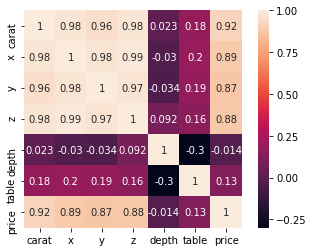

In [25]:
correlation = train_df.corr()
sns.heatmap(data = correlation, square = True , annot = True, cbar = True)

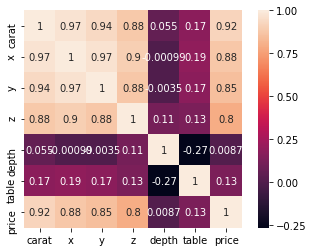

In [26]:
correlation = test_df.corr()
sns.heatmap(data = correlation, square = True , annot = True, cbar = True)

Label Encoding

In [27]:
diamond_cut = {'Fair': 0,
               'Good': 1,
               'Very Good': 2, 
               'Premium': 3,
               'Ideal': 4}

diamond_color = {'J': 0,
                 'I': 1, 
                 'H': 2,
                 'G': 3,
                 'F': 4,
                 'E': 5,
                 'D': 6}

diamond_clarity = {'I1': 0,
                   'SI2': 1,
                   'SI1': 2,
                   'VS2': 3,
                   'VS1': 4,
                   'VVS2': 5,
                   'VVS1': 6,
                   'IF': 7}

In [28]:
#train_df.cut = train_df.cut.map(diamond_cut);
#train_df.clarity = train_df.clarity.map(diamond_clarity);
#train_df.color = train_df.color.map(diamond_color);

In [29]:
#test_df.cut = test_df.cut.map(diamond_cut);
#test_df.clarity = test_df.clarity.map(diamond_clarity);
#test_df.color = test_df.color.map(diamond_color);

One-Hot Encoding

In [30]:
columns = ['cut','color','clarity']

In [31]:
train_df = pd.get_dummies(train_df, columns = columns, prefix = columns)

In [32]:
test_df = pd.get_dummies(test_df, columns = columns, prefix = columns)

Split Features and Targets

In [33]:
train_features_df = train_df.drop(labels=['price', 'depth', 'table'], axis = 1)
train_targets_df = train_df.price

In [34]:
test_features_df = test_df.drop(labels=['price', 'depth', 'table'], axis = 1)
test_targets_df = test_df.price

Split data in training set and validation set

In [35]:
train_cross_features = train_features_df.values
train_cross_targets = train_targets_df.values 

training_set_size = 0.8 # (0 to 1)

training_size = round(train_features_df.shape[0] * training_set_size)

training_X = train_features_df.values[:training_size]
validation_X = train_features_df.values[training_size:]

training_Y = train_targets_df.values[:training_size]
validation_Y = train_targets_df.values[training_size:]

In [36]:
test_X = test_features_df.values
test_Y = test_targets_df.values

Feature Normalization

In [37]:
# Min-Max Normalization

cross_minimum = np.min(train_cross_features, axis = 0)
cross_maximum = np.max(train_cross_features, axis = 0)

train_cross_features = (train_cross_features - cross_minimum) / (cross_maximum - cross_minimum)

minimum = np.min(training_X, axis = 0)
maximum = np.max(training_X, axis = 0)

training_X = (training_X - minimum) / (maximum - minimum)
validation_X = (validation_X - minimum) / (maximum - minimum)

test_X = (test_X - minimum) / (maximum - minimum)

# Mean Normalization - It's possible to change (max - min) in denominator for standard deviation 

#mean = np.mean(training_X, axis = 0)
#minimum = np.min(training_X, axis = 0)
#maximum = np.max(training_X, axis = 0)

#training_X = (training_X - mean) / (maximum - minimum)
#validation_X = (validation_X - mean) / (maximum - minimum)

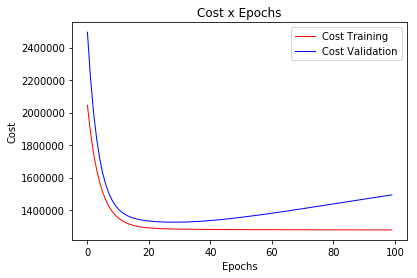

Best Validation Epoch: [28, 1325527.4996043157]


In [38]:
total_epoch = 100

training_epochs = []
validation_epochs = []

regressor = linear_model.SGDRegressor(loss = "squared_loss",
                                      shuffle = False,
                                      max_iter = 100, 
                                      fit_intercept = True,
                                      learning_rate = "constant",
                                      penalty = None,
                                      eta0 = 0.01)

select = float('inf')

best_epoch = None
best_model = None

for epoch in range(total_epoch):
    
    regressor.partial_fit(training_X, training_Y)
    
    training_prediction_Y = regressor.predict(training_X)
    training_mse = mean_squared_error(training_Y, training_prediction_Y)
    
    training_epochs.append([epoch, training_mse])
    
    validation_prediction_Y = regressor.predict(validation_X)
    validation_mse = mean_squared_error(validation_Y, validation_prediction_Y)
    
    validation_epochs.append([epoch, validation_mse])
    
    if (validation_mse < select):
        
        select = validation_mse
        best_epoch = [epoch, validation_mse]
        best_model = deepcopy(regressor)
    
training_df = pd.DataFrame(data = training_epochs, columns = ['Epoch', 'Cost'])
validation_df = pd.DataFrame(data = validation_epochs, columns = ['Epoch', 'Cost'])

plt.plot(training_df['Epoch'], training_df['Cost'], linewidth = 1.0, color = 'red')
plt.plot(validation_df['Epoch'], validation_df['Cost'], linewidth = 1.0, color = 'blue')

plt.xlabel('Epochs')
plt.ylabel('Cost')

plt.title("Cost x Epochs")
plt.legend(['Cost Training', 'Cost Validation'])

plt.show()

print("Best Validation Epoch: " + str(best_epoch))

In [39]:
prediction_Y = best_model.predict(validation_X)

accuracies = cross_val_score(estimator = best_model, X = train_cross_features, y = train_cross_targets, cv = 5)

#print('Coefficients: \n', best_model.coef_)
#print('Intercept: \n', best_model.intercept_)
print("Cross Validation Accuracies (Training): ", accuracies)
print("Cross Validation Mean (Training): ", accuracies.mean())

print("Mean Squared Error (Validation): %.2f" % mean_squared_error(validation_Y, prediction_Y))
print('Linear Regression Accuracy (Validation): ', best_model.score(validation_X, validation_Y))

Cross Validation Accuracies (Training):  [0.91823466 0.91882827 0.91946486 0.91667034 0.91824106]
Cross Validation Mean (Training):  0.9182878373516378
Mean Squared Error (Validation): 1325527.50
Linear Regression Accuracy (Validation):  0.918002632515262


In [40]:
test_prediction_Y = best_model.predict(test_X)
print("Mean Squared Error (Test): %.2f" % mean_squared_error(test_Y, test_prediction_Y))
print('Linear Regression Accuracy (Test): ', best_model.score(test_X, test_Y))

Mean Squared Error (Test): 1317457.14
Linear Regression Accuracy (Test):  0.9170005619046967


In [41]:
class SGDRegressor:
    
    def __init__(self, max_iter = 1000, fit_intercept = False, eta0 = 0.01):
        
        self.max_iter = max_iter
        self.fit_intercept = fit_intercept
        self.eta0 = eta0
        
        self.coef_ = np.array([]) 
        self.intercept_ = np.array([0])
        
    def fit(self, X, y):
        
        self.intercept_ = np.zeros(1)
        self.coef_ = np.zeros(X.shape[1])
            
        for iteration in range(self.max_iter):
            
            for inputs, target in zip(X, y):

                if (self.fit_intercept):

                    output = np.dot(self.coef_, inputs) + self.intercept_

                    self.intercept_ = self.intercept_ - (self.eta0 * (output - target))
                    self.coef_ = self.coef_ - (self.eta0 * (output - target) * inputs)

                else:

                    outputs = np.dot(self.coef_, inputs) + self.intercept_

                    self.coef_ = self.coef_ - (self.eta0 * (outputs - targets) * inputs)
    
    
    def partial_fit(self, X, y):
        
        if (not self.intercept_.any()):
            self.intercept_ = np.zeros(1)
        
        if (not self.coef_.any()):
            self.coef_ = np.zeros(X.shape[1])
                
        for inputs, target in zip(X, y):
            
            if (self.fit_intercept):
            
                output = np.dot(self.coef_, inputs) + self.intercept_
                
                self.intercept_ = self.intercept_ - (self.eta0 * (output - target))
                
                self.coef_ = self.coef_ - (self.eta0 * (output - target) * inputs)
                
            else:
                
                output = np.dot(self.coef_, inputs) + self.intercept_
                
                self.coef_ = self.coef_ - (self.eta0 * (output - target) * inputs)
    
                
    def predict(self, X):
        
        outputs = np.array([])
        
        for inputs in X:
            
            output = 0
            
            if (self.fit_intercept):
                
                output = np.dot(self.coef_, inputs) + self.intercept_
                
            else:
                
                output = np.dot(self.coef_, inputs)
            
            outputs = np.append(outputs, [output])
        
        return outputs
    
    def score(self, X, y):
        
        predicted_y = self.predict(X)
        
        u = ((y - predicted_y) ** 2).sum() 
        v = ((y - y.mean()) ** 2).sum()
        
        return (1 - u/v)
    
    def get_params(self, deep = True):
        
        dictionary = {
            'eta0': self.eta0,
            'fit_intercept': self.fit_intercept,
            'max_iter': self.max_iter,
        }
        
        return dictionary

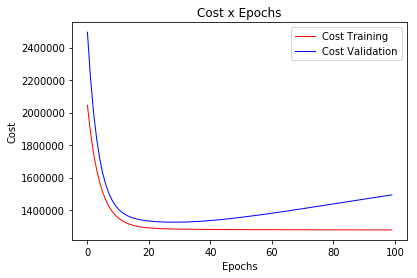

Best Validation Epoch: [28, 1325527.4996043157]


In [42]:
total_epoch = 100

training_epochs = []
validation_epochs = []

regressor = SGDRegressor(max_iter = 100, 
                         fit_intercept = True, 
                         eta0 = 0.01)

select = float('inf')

best_epoch = None
best_model = None

for epoch in range(total_epoch):
    
    regressor.partial_fit(training_X, training_Y)
    
    training_prediction_Y = regressor.predict(training_X)
    training_mse = mean_squared_error(training_Y, training_prediction_Y)
    
    training_epochs.append([epoch, training_mse])
    
    validation_prediction_Y = regressor.predict(validation_X)
    validation_mse = mean_squared_error(validation_Y, validation_prediction_Y)
    
    validation_epochs.append([epoch, validation_mse])
    
    if (validation_mse < select):
        
        select = validation_mse
        best_epoch = [epoch, validation_mse]
        best_model = deepcopy(regressor)
    
training_df = pd.DataFrame(data = training_epochs, columns = ['Epoch', 'Cost'])
validation_df = pd.DataFrame(data = validation_epochs, columns = ['Epoch', 'Cost'])

plt.plot(training_df['Epoch'], training_df['Cost'], linewidth = 1.0, color = 'red')
plt.plot(validation_df['Epoch'], validation_df['Cost'], linewidth = 1.0, color = 'blue')

plt.xlabel('Epochs')
plt.ylabel('Cost')

plt.title("Cost x Epochs")
plt.legend(['Cost Training', 'Cost Validation'])

plt.show()

print("Best Validation Epoch: " + str(best_epoch))

In [43]:
prediction_Y = best_model.predict(validation_X)

accuracies = cross_val_score(estimator = best_model, X = train_cross_features, y = train_cross_targets, cv = 5)

#print('Coefficients: \n', best_model.coef_)
#print('Intercept: \n', best_model.intercept_)
print("Cross Validation Accuracies (Training): ", accuracies)
print("Cross Validation Mean (Training): ", accuracies.mean())

print("Mean Squared Error (Validation): %.2f" % mean_squared_error(validation_Y, prediction_Y))
print('Linear Regression Accuracy (Validation): ', best_model.score(validation_X, validation_Y))

Cross Validation Accuracies (Training):  [0.91823466 0.91882827 0.91946486 0.91667034 0.91824106]
Cross Validation Mean (Training):  0.9182878373516378
Mean Squared Error (Validation): 1325527.50
Linear Regression Accuracy (Validation):  0.918002632515262


In [44]:
test_prediction_Y = best_model.predict(test_X)

print("Mean Squared Error (Test): %.2f" % mean_squared_error(test_Y, test_prediction_Y))
print('Linear Regression Accuracy (Test): ', best_model.score(test_X, test_Y))

Mean Squared Error (Test): 1317457.14
Linear Regression Accuracy (Test):  0.9170005619046967


In [45]:
regressor = linear_model.LinearRegression(fit_intercept = True)

regressor.fit(training_X, training_Y)

prediction_Y = regressor.predict(validation_X)

test_prediction_Y = regressor.predict(test_X)

accuracies = cross_val_score(estimator = regressor, X = train_cross_features, y = train_cross_targets, cv = 5)

#print('Coefficients: \n', regressor.coef_)
#print('Intercept: \n', regressor.intercept_)
print("Cross Validation Accuracies (Training): ", accuracies)
print("Cross Validation Mean (Training): ", accuracies.mean())

print("Mean Squared Error (Validation): %.2f" % mean_squared_error(validation_Y, prediction_Y))
print('Linear Regression Accuracy (Validation): ', regressor.score(validation_X, validation_Y))

Cross Validation Accuracies (Training):  [0.91960485 0.9205596  0.92072409 0.91852671 0.88545418]
Cross Validation Mean (Training):  0.9129738830322838
Mean Squared Error (Validation): 1856356.59
Linear Regression Accuracy (Validation):  0.885165450403318


In [46]:
print("Mean Squared Error (Test): %.2f" % mean_squared_error(test_Y, test_prediction_Y))
print('Linear Regression Accuracy (Test): ', regressor.score(test_X, test_Y))

Mean Squared Error (Test): 1558924.19
Linear Regression Accuracy (Test):  0.901788203622255


In [47]:
class LinearRegression:
    
    def __init__(self, fit_intercept = True):
        
        self.fit_intercept = fit_intercept
        
        self.coef_ = None
        self.intercept_ = None
    
    def fit(self, X, y):
        
        X_b = X
        
        if (self.fit_intercept):
            
            X_b = np.insert(X, 0, 1, axis = 1)
            
            # Compute the (Moore-Penrose) pseudo-inverse of a matrix, which grants to compute even if matrix is not invertible
            coefficients = np.linalg.pinv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
        
            self.intercept_ = coefficients[0]
            self.coef_ = coefficients[1:]
            
        else:
            
            # Compute the (Moore-Penrose) pseudo-inverse of a matrix, which grants to compute even if matrix is not invertible
            coefficients = np.linalg.pinv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
            
            self.intercept_ = 0.0
            self.coef_ = coefficients
            
            
    
    def predict(self, X):
        
        outputs = np.array([])
        
        for inputs in X:
            
            output = 0
            
            output = np.dot(self.coef_, inputs) + self.intercept_
                
            outputs = np.append(outputs, [output])
        
        return outputs
        
    def score(self, X, y):
        
        predicted_y = self.predict(X)
        
        u = ((y - predicted_y) ** 2).sum() 
        v = ((y - y.mean()) ** 2).sum()
        
        return (1 - u/v)
        
    def get_params(self, deep = True):
        
        dictionary = {
            'fit_intercept': self.fit_intercept
        }
        
        return dictionary

In [48]:
regressor = LinearRegression(fit_intercept = True)

regressor.fit(training_X, training_Y)

test_prediction_Y = regressor.predict(test_X)

accuracies = cross_val_score(estimator = regressor, X = train_cross_features, y = train_cross_targets, cv = 5)

#print('Coefficients: \n', regressor.coef_)
#print('Intercept: \n', regressor.intercept_)
print("Cross Validation Accuracies (Training): ", accuracies)
print("Cross Validation Mean (Training): ", accuracies.mean())

print("Mean Squared Error (Validation): %.2f" % mean_squared_error(validation_Y, prediction_Y))
print('Linear Regression Accuracy (Validation): ', regressor.score(validation_X, validation_Y))

Cross Validation Accuracies (Training):  [0.91960485 0.92056477 0.92073439 0.91852463 0.88547353]
Cross Validation Mean (Training):  0.9129804310455081
Mean Squared Error (Validation): 1856356.59
Linear Regression Accuracy (Validation):  0.8854735274214901


In [49]:
print("Mean Squared Error (Test): %.2f" % mean_squared_error(test_Y, test_prediction_Y))
print('Linear Regression Accuracy (Test): ', regressor.score(test_X, test_Y))

Mean Squared Error (Test): 1541584.29
Linear Regression Accuracy (Test):  0.902880612777243
